In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from pandasql import sqldf
#%matplotlib inline

pd.options.display.max_columns = None

In [2]:
mysql = lambda q: sqldf(q, globals())

In [3]:
df = pd.read_csv('ground-truth-clean.csv', index_col = 0)

In [4]:
df.reset_index(drop = True, inplace = True)

In [5]:
display(df.head())

,SCHOOL,STATE,ABBR,ID,COUNTY,CHARTER,MAGNET,LOCALE,TITLE I,TITLE I ELIGIBLE,TOTAL STUDENTS,FREE LUNCH ELIGIBLE,REDUCED PRICE LUNCH ELIGIBLE,FREE AND REDUCED LUNCH ELIGIBLE,MALE STUDENTS,FEMALE STUDENTS,AMERICAN INDIAN,ASIAN,HISPANIC,BLACK,WHITE,TOTAL RACE/ETHINICITY,FTE TEACHERS,PUPIL-TEACHER RATIO,FREE LUNCH ELIGIBLE NUMERIC,REDUCED PRICE LUNCH ELIGIBLE NUMERIC
0,101 ELEMENTARY ...,California,CA,6.410401e+10,SAN BERNARDINO,1-Yes,2-No,3-Urban fringe of large city,†,2-No,87,0,0,0,38,49,0,1,24,17,45,87,0,0,0.0,0.0
1,3R MIDDLE/COMMUNITY,California,CA,6.910231e+10,NEVADA,2-No,2-No,6-Small town,†,2-No,14,0,0,0,13,1,0,0,0,0,14,14,1,14,0.0,0.0
2,4-J ELEMENTARY SCHOOL,Wyoming,WY,5.601470e+11,CAMPBELL,2-No,2-No,6-Small town,2-No,1-Yes,51,12,3,15,29,22,0,0,2,0,49,51,0,0,12.0,3.0
3,5TH AND 6TH GRADE CTR.,Missouri,MO,2.928260e+11,SCOTT,2-No,2-No,6-Small town,†,2-No,649,272,29,301,345,304,4,2,2,168,473,649,0,0,272.0,29.0
4,6TH GRADE CENTER,Texas,TX,4.821720e+11,HUNT,2-No,–,3-Urban fringe of large city,1-Yes,1-Yes,792,333,85,418,388,404,3,4,116,196,473,792,49,0,333.0,85.0


In [6]:
df.shape

(181545, 26)

There are 181545 rows and 24 column in our database for ground truth. As we are interested in Title I status of a school, we are going to drop all those rows where Title I is not known.

In [7]:
df['TITLE I ELIGIBLE'].unique()

array(['2-No', '1-Yes'], dtype=object)

After having cleaned the data earlier, we have 181545 schools whose Title I eligiblity is either '1-Yes' or '2-No'. We will perform an Exploratory Data Analysis on these schools with regards to their location, racial makeup as well as teacher counts to get a picture about the dataset we have in hand.

## Distribution of Title I Eligibility

In [8]:
print( df.groupby(['TITLE I ELIGIBLE']).size())

TITLE I ELIGIBLE
1-Yes    99666
2-No     81879
dtype: int64


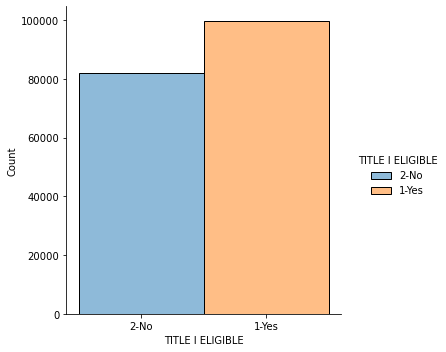

In [9]:
sns.displot( data = df, x = 'TITLE I ELIGIBLE', hue = 'TITLE I ELIGIBLE', kind = 'hist')
plt.show()

There are 99666 Schools that are Title I eligible and 81879 Schools that are not eligible for Title I.

## Title I eligibility and States

In [10]:
len(df['STATE'].unique())

45

There are 45 states represented in the database with the most number of schools being from California, Texas and Ohio. Washington D.C., Vermont and Rhode Island have the fewest number of schools represented in our dataset.

In [11]:
df_states_grouped = df[['ABBR', 'TITLE I ELIGIBLE']]

In [12]:
df_states_grouped['TITLE I'] = df_states_grouped['TITLE I ELIGIBLE'].apply( lambda x : 1 if ( x == '1-Yes') else 0)

/var/folders/yt/w_mnp3g172s5rgtjxs97bk3m0000gn/T/ipykernel_53508/3781748967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states_grouped['TITLE I'] = df_states_grouped['TITLE I ELIGIBLE'].apply( lambda x : 1 if ( x == '1-Yes') else 0)


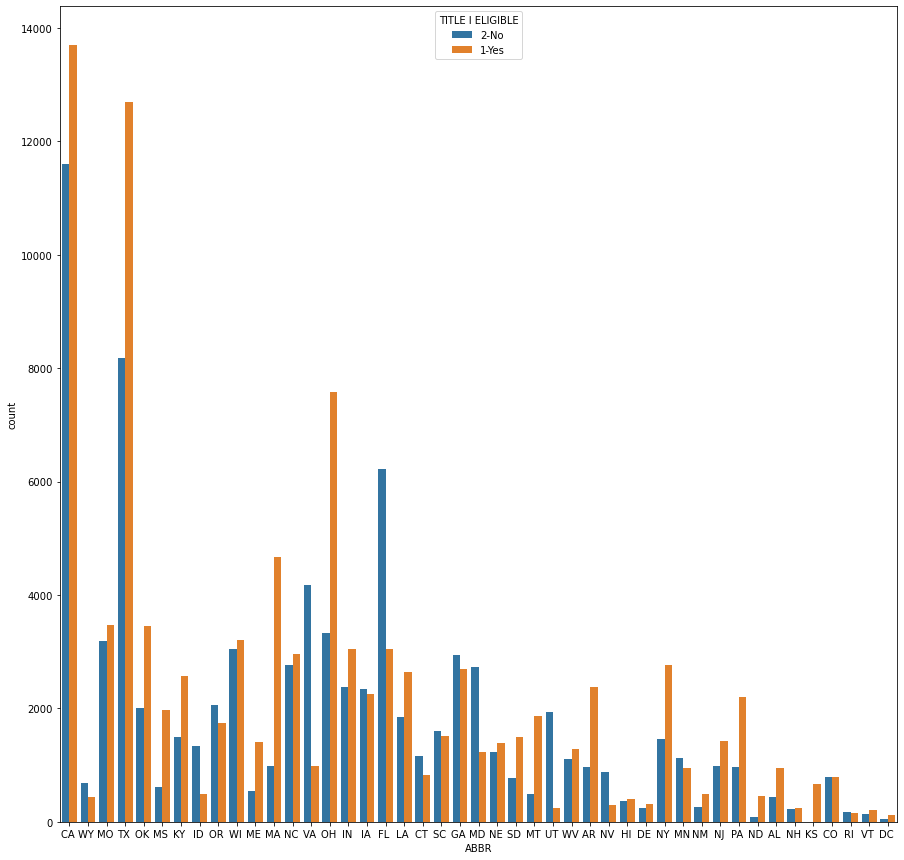

In [13]:
plt.figure(figsize=(15, 15))
ax = sns.countplot( data = df_states_grouped, x = 'ABBR', hue = 'TITLE I ELIGIBLE')
#plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.show()

## Correlation between Title I status and Free Lunch Eligibility

Let us look at the correlation between the Title I eligibility of a school and the proportion of students benefitting from the Free Lunch as the proportion of student body in the school.

In [14]:
title_i_index = df[df['TITLE I ELIGIBLE'] == '1-Yes'].index

In [15]:
df_title_i = df.iloc[title_i_index]

In [16]:
df_title_i.reset_index(inplace = True, drop = True)

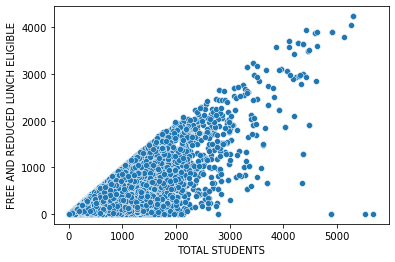

In [17]:
sns.scatterplot( data = df_title_i, x = 'TOTAL STUDENTS', y = 'FREE AND REDUCED LUNCH ELIGIBLE')
plt.show()

In [18]:
print((df_title_i['FREE AND REDUCED LUNCH ELIGIBLE'] / df_title_i['TOTAL STUDENTS']).mean() )
print((df_title_i['FREE LUNCH ELIGIBLE']/df_title_i['TOTAL STUDENTS']).mean())

0.517657904609012
0.42593989984185743


There is a positive correlation between the number of students in a school and the number of free and reduced lunch eligible students in a school.

It is also worth noticing that 51.8% of students in a Title I designated school are eligible for free or reduced lunch. 42.6% of students qualify for Free Lunch.

Let us now see the same relationship in schools that do not have Title I eligibility.

In [19]:
not_title_i = df[df['TITLE I ELIGIBLE'] == '2-No'].index


In [20]:
df_not_title_i = df.iloc[not_title_i]


In [21]:
df_not_title_i.reset_index( inplace = True, drop = True)

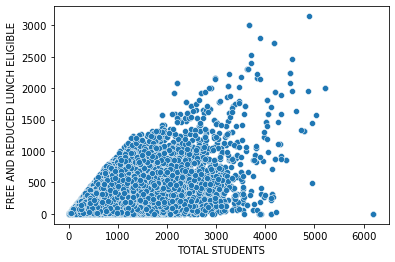

In [22]:
sns.scatterplot( data = df_not_title_i, x = 'TOTAL STUDENTS', y = 'FREE AND REDUCED LUNCH ELIGIBLE')
plt.show()

In [23]:
print( (df_not_title_i['FREE AND REDUCED LUNCH ELIGIBLE']/(df_not_title_i['TOTAL STUDENTS'])).mean())
print( (df_not_title_i['FREE LUNCH ELIGIBLE']/(df_not_title_i['TOTAL STUDENTS'])).mean())

0.2786456909631611
0.21571012014853508


In contrast to Title I designated schools, for non-Title I designated schools, only 27.9% of students would qualify for free and reduced lunch and 21.6% of students would qualify for free lunch.

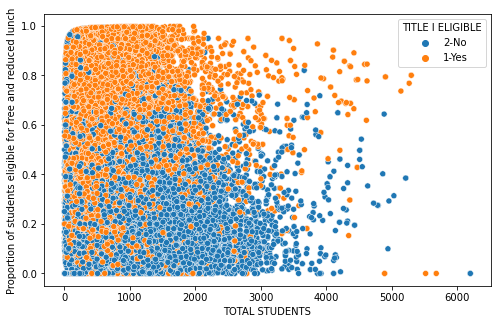

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot( data = df, x = df['TOTAL STUDENTS'], y = df['FREE AND REDUCED LUNCH ELIGIBLE']/ df['TOTAL STUDENTS'], hue = 'TITLE I ELIGIBLE')
plt.ylabel("Proportion of students eligible for free and reduced lunch")
plt.show()

## Racial Makeup of Title I schools vs non-Title I schools

In [25]:
race_title_i = df_title_i[['AMERICAN INDIAN', 'ASIAN', 'HISPANIC', 'BLACK', 'WHITE', 'TOTAL STUDENTS', 'FTE TEACHERS']].describe().transpose()

In [26]:
display(race_title_i)

,count,mean,std,min,25%,50%,75%,max
AMERICAN INDIAN,99666.0,6.220316,27.030670,0.0,0.0,1.0,3.0,1057.0
ASIAN,99666.0,17.664841,63.739037,0.0,0.0,2.0,9.0,2165.0
HISPANIC,99666.0,114.307276,257.921804,0.0,2.0,10.0,94.0,5082.0
BLACK,99666.0,99.465304,174.009407,0.0,2.0,16.0,125.0,3014.0
WHITE,99666.0,249.829872,222.432276,0.0,80.0,206.0,362.0,2643.0
TOTAL STUDENTS,99666.0,488.156814,349.717114,4.0,269.0,431.0,622.0,5677.0
FTE TEACHERS,99666.0,11.641322,18.026678,0.0,0.0,0.0,23.0,215.0


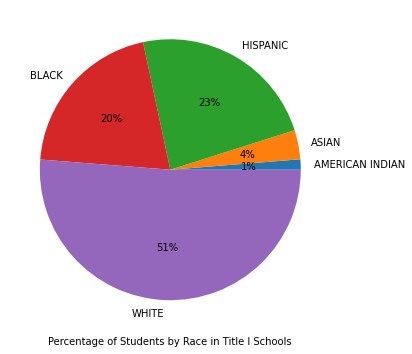

In [27]:
plt.figure(figsize = [6, 6])
plt.pie(data = race_title_i[0:5], x = 'mean', labels = race_title_i.index[0:5], autopct='%.0f%%')
plt.xlabel('Percentage of Students by Race in Title I Schools')
plt.show()

In [28]:
race_non_title_i = df_not_title_i[['AMERICAN INDIAN', 'ASIAN', 'HISPANIC', 'BLACK', 'WHITE', 'TOTAL STUDENTS', 'FTE TEACHERS']].describe().transpose()

In [29]:
display(race_non_title_i)

,count,mean,std,min,25%,50%,75%,max
AMERICAN INDIAN,81879.0,4.358688,17.426561,0.0,0.0,1.0,3.0,1231.0
ASIAN,81879.0,29.952332,92.449080,0.0,1.0,5.0,22.0,2310.0
HISPANIC,81879.0,65.129960,176.713214,0.0,2.0,11.0,50.0,4193.0
BLACK,81879.0,89.189328,183.471701,0.0,2.0,17.0,91.0,3178.0
WHITE,81879.0,412.250406,373.476328,0.0,133.0,339.0,570.0,3874.0
TOTAL STUDENTS,81879.0,607.508372,526.115992,4.0,252.0,508.0,792.0,6197.0
FTE TEACHERS,81879.0,14.278130,24.553690,0.0,0.0,0.0,25.0,426.0


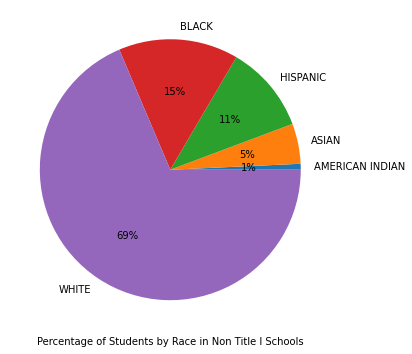

In [30]:
plt.figure(figsize = [6, 6])
plt.pie(data = race_non_title_i[0:5], x = 'mean', labels = race_non_title_i.index[0:5], autopct='%.0f%%' )
plt.xlabel('Percentage of Students by Race in Non Title I Schools')
plt.show()

In [31]:
race_all_school = df[['AMERICAN INDIAN', 'ASIAN', 'HISPANIC', 'BLACK', 'WHITE', 'TOTAL STUDENTS', 'FTE TEACHERS']].describe().transpose()

In [32]:
display(race_all_school)

,count,mean,std,min,25%,50%,75%,max
AMERICAN INDIAN,181545.0,5.380699,23.215144,0.0,0.0,1.0,3.0,1231.0
ASIAN,181545.0,23.206648,78.245935,0.0,0.0,3.0,14.0,2310.0
HISPANIC,181545.0,92.127709,226.281309,0.0,2.0,11.0,67.0,5082.0
BLACK,181545.0,94.830714,178.411973,0.0,2.0,16.0,108.0,3178.0
WHITE,181545.0,323.083505,310.809125,0.0,97.0,256.0,450.0,3874.0
TOTAL STUDENTS,181545.0,541.985816,442.162317,4.0,263.0,459.0,691.0,6197.0
FTE TEACHERS,181545.0,12.830554,21.260914,0.0,0.0,0.0,24.0,426.0


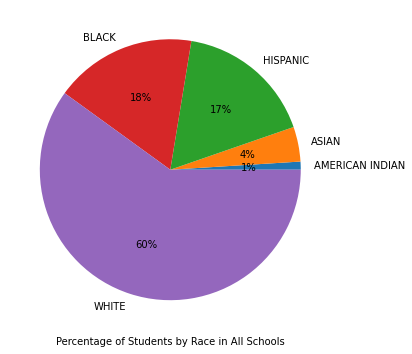

In [33]:
plt.figure(figsize = [6, 6])
plt.pie(data = race_all_school[0:5], x = 'mean', labels = race_all_school.index[0:5], autopct='%.0f%%' )
plt.xlabel('Percentage of Students by Race in All Schools')
plt.show()

The racial makeup of Title I eligible schools and Title I non-eligible schools differs quite a bit. On average, Black and Hispanic students make up 35% of total student body of a school.


In Title I eligible schools, Black and Hispanic students comprise of 43% of total student body, but that percentage drops down to 26% in non-Title I eligible schools.

## Distribution of Schools by Locale

In [34]:
df_locale_title_i = df_title_i[['LOCALE', 'AMERICAN INDIAN', 'ASIAN', 'HISPANIC', 'BLACK', 'WHITE']].groupby('LOCALE').sum()

In [35]:
df_locale_title_i['TOTAL SCHOOLS'] = df_title_i.groupby('LOCALE').size()

In [36]:
df_locale_title_i.reset_index( inplace = True)

In [37]:
df_locale_title_i.drop(df_locale_title_i[df_locale_title_i['LOCALE'] == '†'].index)

,LOCALE,AMERICAN INDIAN,ASIAN,HISPANIC,BLACK,WHITE,TOTAL SCHOOLS
0,1-Large city,47028,582467,3807443,3183577,1394605,13306
1,2-Midsize city,54247,246334,1798021,1937876,2689758,12424
2,3-Urban fringe of large city,76868,648148,3495854,1837379,5857013,19341
3,4-Urban fringe of midsize city,30091,87470,787932,596740,2555201,7790
4,5-Large town,13831,8754,103715,136702,312584,1300
5,6-Small town,135852,42091,639057,1036327,3761144,12918
6,7-Rural - outside CBSA/MSA,217034,93749,346783,822205,4914401,22978
7,8-Rural - inside CBSA/MSA,45002,51569,413633,362084,3414824,9606


In [38]:
df_locale_non_title_i = df_not_title_i[['LOCALE', 'AMERICAN INDIAN', 'ASIAN', 'HISPANIC', 'BLACK', 'WHITE']].groupby('LOCALE').sum()
df_locale_non_title_i['TOTAL SCHOOLS'] = df_not_title_i.groupby('LOCALE').size()
df_locale_non_title_i.reset_index( inplace = True)
df_locale_non_title_i.drop(df_locale_non_title_i[df_locale_title_i['LOCALE'] == '†'].index)

/var/folders/yt/w_mnp3g172s5rgtjxs97bk3m0000gn/T/ipykernel_53508/3089195029.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_locale_non_title_i.drop(df_locale_non_title_i[df_locale_title_i['LOCALE'] == '†'].index)


,LOCALE,AMERICAN INDIAN,ASIAN,HISPANIC,BLACK,WHITE,TOTAL SCHOOLS
0,1-Large city,42177,582766,1193731,1465758,2384501,7697
1,2-Midsize city,50726,282338,822932,1444022,4532784,10858
2,3-Urban fringe of large city,89041,1219356,2275137,2229033,10769756,21933
3,4-Urban fringe of midsize city,26221,120297,331385,626383,4468182,8382
4,5-Large town,8548,11767,35763,69026,453609,1042
5,6-Small town,50866,34743,193177,561766,3170035,8429
6,7-Rural - outside CBSA/MSA,56846,76247,142957,375079,3198997,13535
7,8-Rural - inside CBSA/MSA,32460,124953,337694,531666,4776787,10003


In [39]:
df_locale = df[['LOCALE', 'AMERICAN INDIAN', 'ASIAN', 'HISPANIC', 'BLACK', 'WHITE']].groupby('LOCALE').sum()
df_locale['TOTAL SCHOOLS'] = df.groupby('LOCALE').size()
df_locale.reset_index( inplace = True)
df_locale.drop(df_locale[df_locale['LOCALE'] == '†'].index)

,LOCALE,AMERICAN INDIAN,ASIAN,HISPANIC,BLACK,WHITE,TOTAL SCHOOLS
0,1-Large city,89205,1165233,5001174,4649335,3779106,21003
1,2-Midsize city,104973,528672,2620953,3381898,7222542,23282
2,3-Urban fringe of large city,165909,1867504,5770991,4066412,16626769,41274
3,4-Urban fringe of midsize city,56312,207767,1119317,1223123,7023383,16172
4,5-Large town,22379,20521,139478,205728,766193,2342
5,6-Small town,186718,76834,832234,1598093,6931179,21347
6,7-Rural - outside CBSA/MSA,273880,169996,489740,1197284,8113398,36513
7,8-Rural - inside CBSA/MSA,77462,176522,751327,893750,8191611,19609


<Figure size 1440x1440 with 0 Axes>

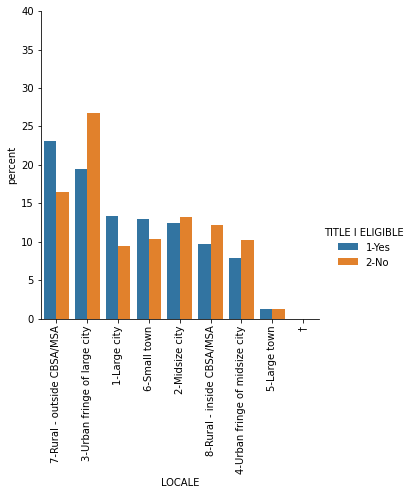

In [40]:
plt.figure(figsize = [20, 20])


y, x = 'TITLE I ELIGIBLE', 'LOCALE'
df1 = df.groupby(y)[x].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)

g.ax.set_ylim(0,40)
plt.xticks(rotation = 90)
#g.ax.set_xticks(g.ax.get_xticks(), rotation = 45)

plt.show()
